# ROC Curve and Area Under the Curve (AUC)
Similar to manually adjusting the Hyperparameters, manually adjusting the Classification Threshold is hectic  

Instead we can automate the process by Plotting the ROC Curve!

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
pima_df = pd.read_csv('../data/pima.csv', dtype = {'diabetes': 'int8'})
pima_df.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1


In [4]:
feature_cols = ['num_preg', 'insulin', 'bmi', 'age']
X = pima_df[feature_cols]
y = pima_df.diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)    # It has 2 columns, for each class
y_pred_prob[:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

# ROC Curve
> It helps choose a Threshold that balances Sensitivity and Specificity in a way that makes sense  
> But we can't see the Threshold used

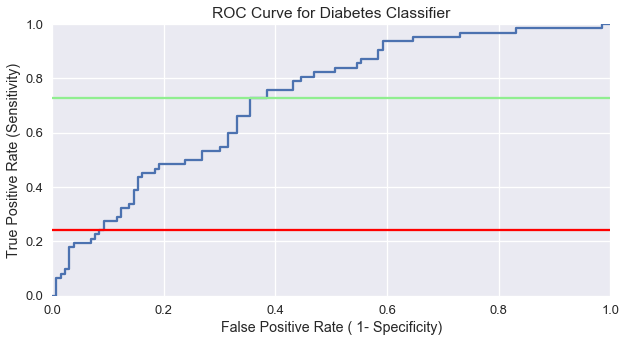

In [5]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:, 1])

sns.set_context('talk')
plt.figure(figsize = (10, 5))
plt.plot(fpr, tpr)

plt.axhline(y = 0.24193548387096775, color = 'red')    # Depicts Threshold 0.5

plt.axhline(y = 0.7258064516129032, color = 'lightgreen')    # Depicts Threshold 0.3

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title('ROC Curve for Diabetes Classifier')
plt.xlabel('False Positive Rate ( 1- Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.grid(True)

plt.show()

> Here if we want a Sensitivity of 0.9  
> We should be willing to accept a Specificity of 0.4

In [6]:
# Helper Function that Accepts a Threshold and Prints Sensitivity and Specificity
def evaluate_threshold(threshold):
    print('Sensitivity: {}'.format(tpr[thresholds > threshold][-1]))
    print('Specificity: {}'.format(1 - fpr[thresholds > threshold][-1]))

evaluate_threshold(0.5)    # Default

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [7]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


# Area Under The Curve (AUC)
> An Ideal Classifier hugs the upper left corner of the plot, which means more area under the curve

> Hence AUC is a single number summary of classifier performance

> It represents the likelihood that the classifier will assign  
> **Higher Predicted Probability** to the positive observation

> It is useful even in case of **High Class Imbalance** (Unlike Classification Accuracy)  
> e.g. In Fraudulent Transaction Detection system - 99.99% of the DataSet would be non Fraudulent

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv = 10, scoring = 'roc_auc').mean()

0.73782336182336183

# Confusion Matrix Advantages:
- Allows calculation of **Various Metrics**
- Use for **Multi-Class Problems** (More than 2 classes)

# ROC / AUC Advantages:
- Does not requires setting a **Classification Threshold**
- Useful in case of **High Class Imbalance**